In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
# %matplotlib notebook
import matplotlib.pyplot as plt

from scipy.fftpack import fft
from scipy import signal

Ganglion Channel Map

<img src="https://raw.githubusercontent.com/OpenBCI/Docs/master/assets/images/ganglion_10-20-positions.png" width="300">

## Data Preparation

In [2]:
colNames = ['timeStamp', 'c1' ,'c2', 'c3', 'c4', 'a1', 'a2', 'a3', 'ganglionTime']
data = pd.read_csv("../Data/OpenBCI-RAW-Right_arm_2019-01-26_17-43-30.txt", sep=',', names=colNames)

In [3]:
data = data[6:]

In [4]:
data.head(5)

,timeStamp,c1,c2,c3,c4,a1,a2,a3,ganglionTime
6,0,-468.42,-63.92,275.29,-3376.99,0.0,0.0,0.0,17:44:28.607
7,1,-443.44,-59.12,229.55,-3438.82,0.0,0.0,0.0,17:44:28.621
8,2,-494.47,-90.53,237.15,-3369.94,0.0,0.0,0.0,17:44:28.622
9,3,-515.58,-94.92,253.93,-3243.61,0.0,0.0,0.0,17:44:28.636
10,4,-461.19,-60.30,273.55,-3368.31,0.0,0.0,0.0,17:44:28.636


## Time Domain Analysis

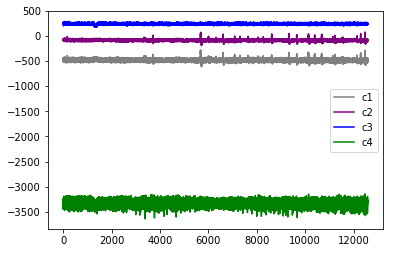

In [5]:
plt.plot(data['c1'],'grey')
plt.plot(data['c2'],'purple')
plt.plot(data['c3'],'blue')
plt.plot(data['c4'],'green')
plt.legend()

plt.show()

## Frequency Domain Analysis

In [6]:
# plt.plot(np.log(fft(sig[:20])))

In [7]:
data.shape

(12570, 9)

In [8]:
X = np.array(data.ix[250:, 1:5])
X.shape

/home/krohak/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


(12326, 4)

In [9]:
X

array([[ -462.79,   -72.94,   268.61, -3364.18],
       [ -431.84,   -53.16,   250.62, -3397.34],
       [ -488.99,   -93.96,   240.02, -3300.66],
       ..., 
       [ -528.87,  -111.49,   265.79, -3332.98],
       [ -477.17,   -71.96,   264.89, -3270.26],
       [ -443.31,   -61.22,   232.  ,      nan]])

Estimate power spectral density using Welch’s method.

Welch’s method computes an estimate of the power spectral density by dividing the data into overlapping segments, computing a modified periodogram for each segment and averaging the periodograms.

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.signal.welch.html

In [10]:
freq, y = signal.welch(X.T, fs=200.0) 

In [11]:
y = y.T

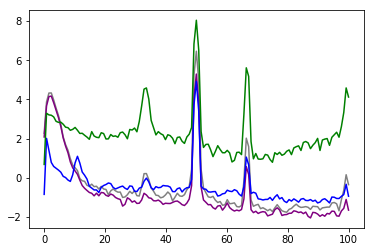

In [12]:
color = ['grey', 'purple', 'blue', 'green']
for i in range(y.shape[1]):
    _ = plt.plot(freq, np.log(y[:, i]), label='Channel {}'.format(i+1), c=color[i])

** Alpha waves!! ** 

## Spectrogram Analysis

In [13]:
data.shape

(12570, 9)

In [14]:
X = np.array(data.ix[250:, 1:5])
X.shape

(12326, 4)

In [15]:
sig = X[:, 0]

In [16]:
sig.shape

(12326,)

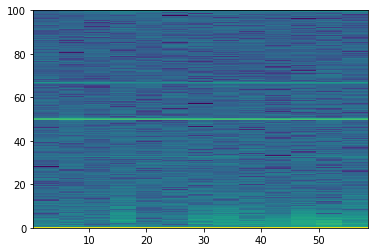

In [17]:
_ = plt.specgram(sig, NFFT=1024, Fs=200.0)

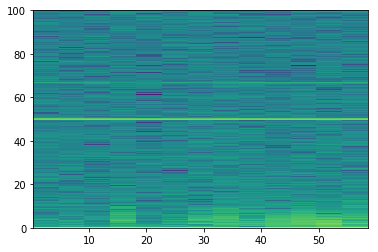

In [18]:
sig = X[:, 1]
_ = plt.specgram(sig, NFFT=1024, Fs=200.0) # sampling rate is 200hz

In [19]:
# sig = X[:, 1]
# _ = plt.specgram(sig, NFFT=1024, Fs=200.0) # sampling rate is 200hz

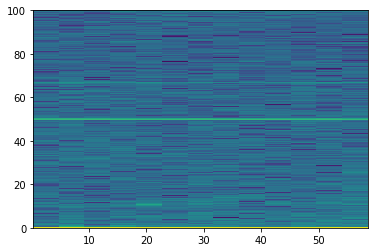

In [20]:
sig = X[:, 2]
_ = plt.specgram(sig, NFFT=1024, Fs=200.0)

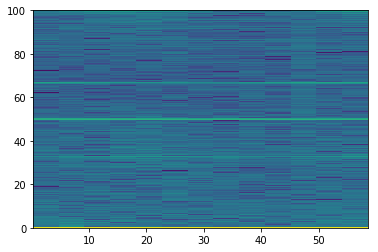

In [21]:
sig = X[:, 3]
_ = plt.specgram(sig, NFFT=1024, Fs=200.0)

In [22]:
b, a = signal.butter(4, (2.0/125, 20.0/125), btype='bandpass') 
b, a

(array([ 0.00154383,  0.        , -0.0061753 ,  0.        ,  0.00926296,
         0.        , -0.0061753 ,  0.        ,  0.00154383]),
 array([  1.        ,  -6.73487615,  19.95410423, -33.99530321,
         36.44616747, -25.18720445,  10.95881593,  -2.74465256,   0.30294898]))

In [23]:
sig_f = signal.lfilter(b, a, X, axis=0)

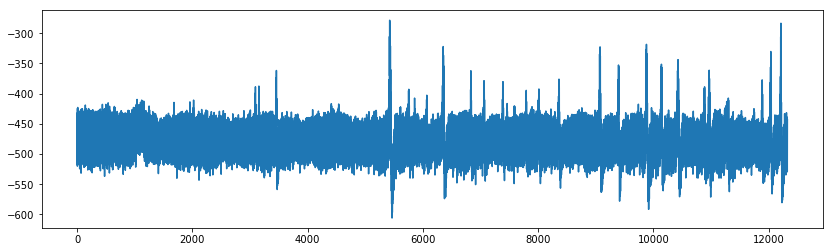

In [33]:
plt.figure(figsize=(14, 4))
plt.plot(X[:, 0]) 

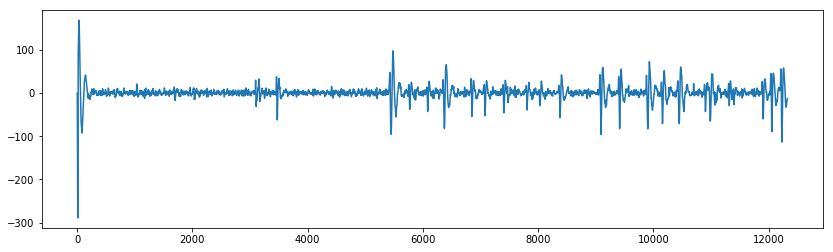

In [34]:
plt.figure(figsize=(14, 4))
plt.plot(sig_f[:, 0]) 

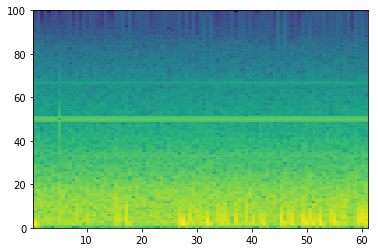

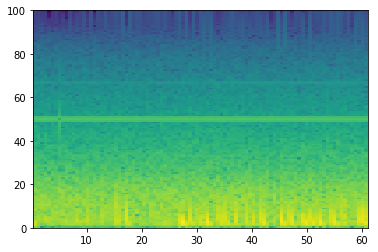

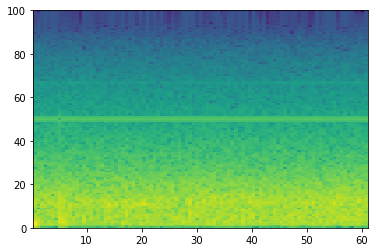

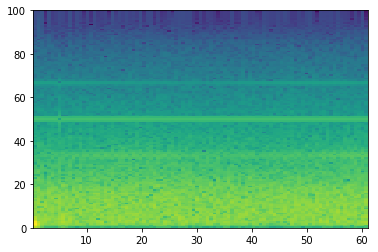

In [30]:
for i in range(0,4):
    plt.specgram(sig_f[:, i], NFFT=256, Fs=200.0)
    plt.show()